# Overview

Test the fact that Binomial and Poisson distribution look increasingly more similar to Gaussian as the mean increases.

Using the following statistical tests: 
- KS
- KL
- AD
- Pearson's Chisq 

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Generate Binomial Datasets with Different Means; Plot Statistical Values 

In [122]:
np.random.seed(123)
normal_dist = np.random.randn(1000)

narray = range(10, 1000, 20)
p = np.linspace(0.3, 0.7, 50)
ks_s = np.zeros(len(narray))
ks_p = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi_p = np.zeros(len(narray))

for i, n in enumerate(narray):

    dist = (np.random.binomial(n, p[-i], 1000) - n*p[-i]) / np.sqrt(n*p[-i]*(1-p[-i]))
    ks_s[i] = scipy.stats.kstest(dist, "norm")[0]
    ks_p[i] = scipy.stats.kstest(dist, "norm")[1]
    ad_b[i] = scipy.stats.anderson(dist, dist="norm")[0]
    
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    kl_b[i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], 
                                    scipy.stats.norm.pdf(bincenters) + n)
    
    #chi sq takes the frequence of each bin from sample and expected distribution (normal)
    
    test_hist = np.array(np.histogram(dist, bins=mybins)[0])
    expect_hist = np.array(np.histogram(normal_dist, bins=np.linspace(min(normal_dist), max(normal_dist), 10))[0])
    
    chi_p[i] = scipy.stats.chisquare(test_hist, f_exp = expect_hist)[1]

In [123]:
threshold = scipy.stats.anderson(normal_dist, 
                                 dist='norm')[1][scipy.stats.anderson(normal_dist, 
                                                                      dist='norm')[2]==[5.0]]

print("AD upper threshold for rejecting NULL hypothesis: %.3f" % threshold)

AD upper threshold for rejecting NULL hypothesis: 0.784


### NULL Hypothesis (Rejection Condition @ 95% confidence)

- KS: two distributions are identical. (p<0.05)
- AD: two distributions are identical. (score > 0.78 threshold)
- KL: two distributions are identical. (TBD)
- Chi Sq: two distribtuion are identical. (p<0.05)

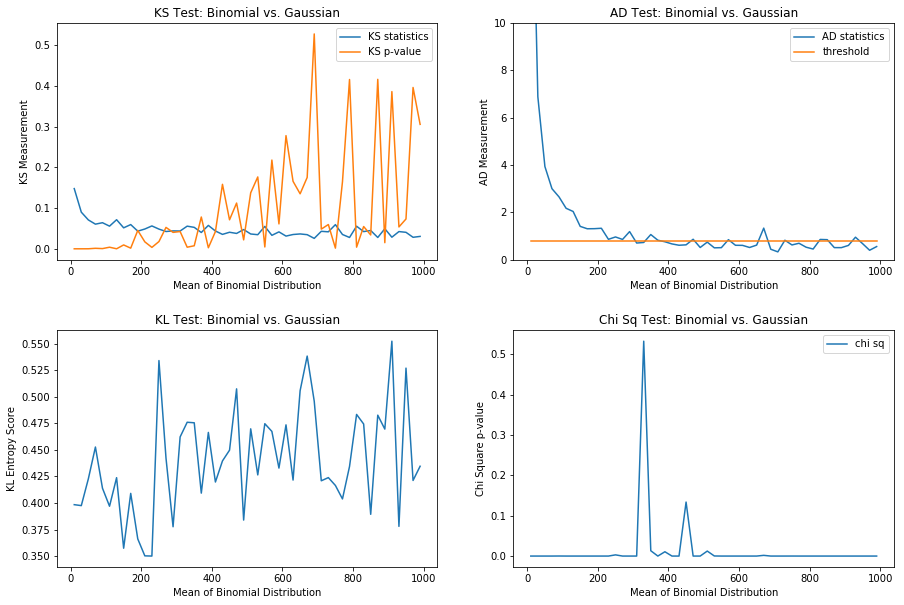

In [124]:
fig = pl.figure(figsize = (15,10))
fig.subplots_adjust(hspace=.3)

fig.add_subplot(221)
pl.plot(narray, ks_s, label='KS statistics')
pl.plot(narray, ks_p, label='KS p-value')
pl.title("KS Test: Binomial vs. Gaussian")
pl.xlabel("Mean of Binomial Distribution")
pl.ylabel("KS Measurement")
pl.legend()

fig.add_subplot(222)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="threshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.title("AD Test: Binomial vs. Gaussian")
pl.xlabel("Mean of Binomial Distribution")
pl.ylabel("AD Measurement")
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_b, label='K-L (entropy)')
pl.title("KL Test: Binomial vs. Gaussian")
pl.xlabel("Mean of Binomial Distribution")
pl.ylabel("KL Entropy Score")

fig.add_subplot(224)
pl.plot(narray, chi_p, label='chi sq')
pl.title("Chi Sq Test: Binomial vs. Gaussian")
pl.xlabel("Mean of Binomial Distribution")
pl.ylabel("Chi Square p-value")

pl.legend();

### Caption:

By observing results from KS and AD tests, one can see that the binomial distribution tends to behave like a normal distribution as its mean increases. 

The p-value and AD threshold indicate that we cannot reject the NULL hypothesis, that binomial and normal distirubtion are identical, whith higher confidence as the mean of the binomial distribution increases.

However, test result from KL entropy is not conclusive given the range of osolation. This may be driven by the randomized process of generating the distributions, which the KL entropy is very sensitive to.

Chi-Square test has a consistent result of p close to 0. This makes sense because this test compare the overall shapes of the histogram of our test sample and normal distribution. The spikes could be cause by the randomized process. 

### 2. Generate Poisson Datasets with Different Means; Plot Statistical Values 

In [133]:
np.random.seed(123)
normal_dist = np.random.randn(1000)

larray = range(1, 100, 5)
ks_s = np.zeros(len(larray))
ks_p = np.zeros(len(larray))
ad_b = np.zeros(len(larray))
kl_b = np.zeros(len(larray))
chi_p = np.zeros(len(larray))

for i, lam in enumerate(larray):

    dist = np.random.poisson(lam, 1000)
    ks_s[i] = scipy.stats.kstest(dist, "norm")[0]
    ks_p[i] = scipy.stats.kstest(dist, "norm")[1]
    ad_b[i] = scipy.stats.anderson(dist, dist="norm")[0]
    
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])
    kl_b[i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], 
                                    scipy.stats.norm.pdf(bincenters) + n)
    
    #chi sq takes the frequence of each bin from sample and expected distribution (normal)
    
    test_hist = np.array(np.histogram(dist, bins=mybins)[0])
    expect_hist = np.array(np.histogram(normal_dist, bins=np.linspace(min(normal_dist), max(normal_dist), 10))[0])
    
    chi_p[i] = scipy.stats.chisquare(test_hist, f_exp = expect_hist)[1]

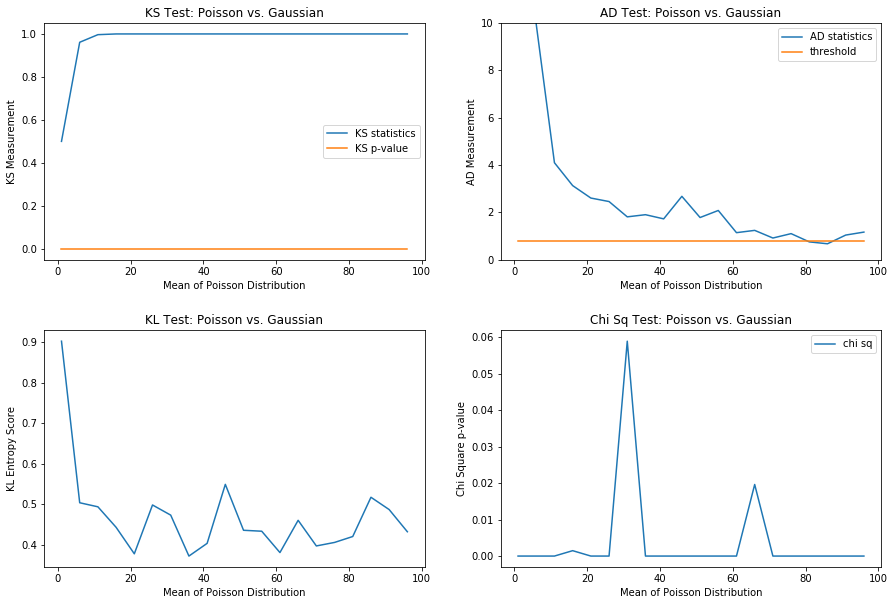

In [135]:
fig = pl.figure(figsize = (15,10))
fig.subplots_adjust(hspace=.3)

fig.add_subplot(221)
pl.plot(larray, ks_s, label='KS statistics')
pl.plot(larray, ks_p, label='KS p-value')
pl.title("KS Test: Poisson vs. Gaussian")
pl.xlabel("Mean of Poisson Distribution")
pl.ylabel("KS Measurement")
pl.legend()

fig.add_subplot(222)
pl.plot(larray, ad_b,  label='AD statistics')
pl.plot([larray[0], larray[-1]],[threshold, threshold], label="threshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.title("AD Test: Poisson vs. Gaussian")
pl.xlabel("Mean of Poisson Distribution")
pl.ylabel("AD Measurement")
pl.legend()

fig.add_subplot(223)
pl.plot(larray, kl_b, label='K-L (entropy)')
pl.title("KL Test: Poisson vs. Gaussian")
pl.xlabel("Mean of Poisson Distribution")
pl.ylabel("KL Entropy Score")

fig.add_subplot(224)
pl.plot(larray, chi_p, label='chi sq')
pl.title("Chi Sq Test: Poisson vs. Gaussian")
pl.xlabel("Mean of Poisson Distribution")
pl.ylabel("Chi Square p-value")

pl.legend();

### Caption:

The test results have very different dynamics when comparing Poisson distributions with increasing mean against a gaussian distribution.

In the KS test, the p-value is always zero regardless of the changing lamda. This is because KS test only apply to continous distribution, but Poisson is a discrete distribution. Therefore, KS is not applicable in this case.

AD test shows consistent results. As the lamda of Poisson increases, the score starts to fall below the threshold. This means the Poisson distribution with high Lamda looks more similar to a gaussian distribution.

KL Entropy (info difference between two samples) shows a slight downward trend as lamda goes from 0 - 20. However, the results vary in a large degree as Lamda goes from 20 to 100, wihch is not conclusive.

Chi-Square test does not support the hypothesis of higher lamda leads to more closer gaussian shape because of the consistent low p-value. 
